#### OVERVIEW

we're trying to decide whether or not companies should focus their efforts and capital more on either one of TV, radio, their newspaper ads to increase sale

import the neccessary library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

Import the dataset

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
#view the first 5 rows in the dataset
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
#Get the shape of the dataset
df.shape

(200, 4)

The dataset has 200 rows and 4 columns

In [5]:
#Get the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


All the columns have same datatypes which is float.

In [6]:
#Decribe the data
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [11]:
#Check  for missing values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There are no null values in the data

In [17]:
#Check for duplicate values
df.duplicated().sum()

0

There are no duplicated values in the data

#### Exploratory Data Analysis

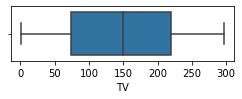

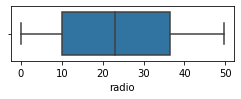

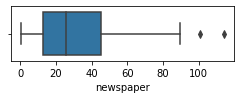

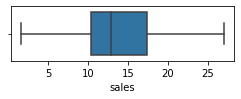

In [18]:
#Check for ouliers
for i in df:
    plt.figure(figsize = (4,1))
    sns.boxplot(x = df[i])
    plt.show()

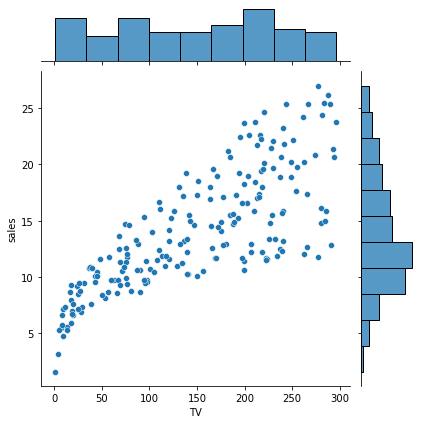

In [22]:
#Create joitplot to compare the TV and Sales columns
sns.jointplot(x='TV',y='sales', data=df)

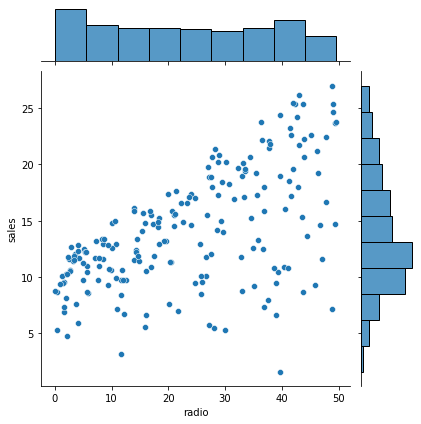

In [25]:
sns.jointplot(x='radio',y='sales', data=df)

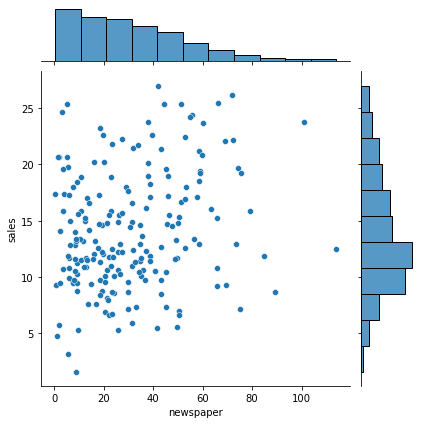

In [28]:
sns.jointplot(x='newspaper',y='sales', data=df)

#### Lets explore these features  and relationships across the entire dataset using pairplot

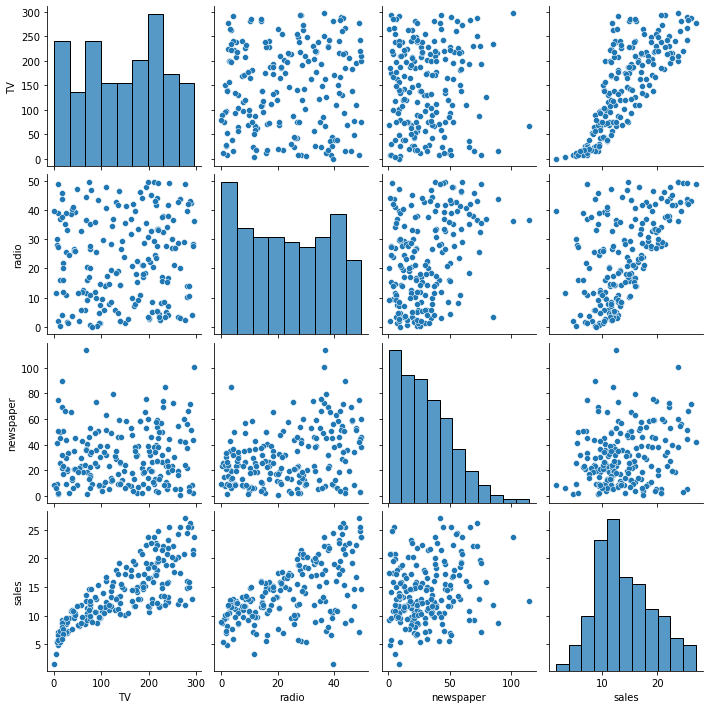

In [29]:
sns.pairplot(df)

#### Plotting a univariate distribution of sale made

<AxesSubplot:xlabel='sales', ylabel='Density'>

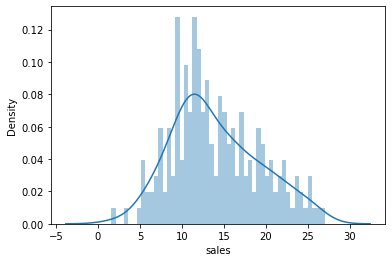

In [35]:
sns.distplot(df['sales'], bins=50, kde = True)

In [40]:
corr = df.corr()

<AxesSubplot:>

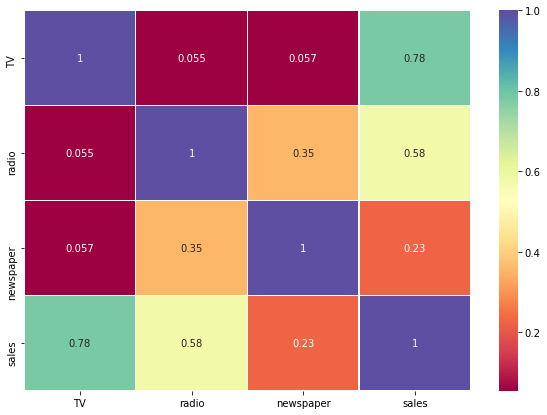

In [43]:
plt.figure(figsize = (10,7))
sns.heatmap(corr, cmap='Spectral', linewidths= 0.2, annot=True)

Comment: With the above plots, the most correlated feature with sale is TV

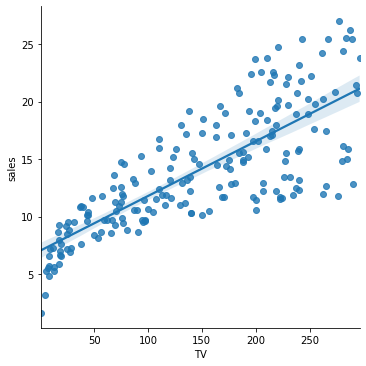

In [44]:
#Creating a linear model plot (using seaborn's lmplot method) of Sale vs TV
sns.lmplot(x='TV', y='sales', data=df)

### Model

#### Dependent and Independent variables

Set a variable X equal to the amounts spent on different adverts (features) and a variable y equal to the 'sale' column.

In [46]:
X = df.iloc[:,0:3]   #independent variables
y = df['sales'] #target variable

In [48]:
# Let's look at the correlation between each variables
X.iloc[:,0:].corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


Comment: No exceptionally high correlation is observed, so we wont be dropping any columns

#### Viewing the OLS model


import the api for statistical models

In [50]:
import statsmodels.api as sm

In [51]:
X_sm = sm.add_constant(X)
ols_model = sm.OLS(y, X_sm).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           1.58e-96
Time:                        17:11:36   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### observations: 

A good R-squared value is observed.

The standard error values are low which indicates the absence of a multi-colinearity relationship between the value

### Training the model
Now that we've eplored the data a bit, we can go ahead and split the data into training and testing sets.

importing model_selection.train_test_split from sklearn to split the data into training and testing sets.

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
#Setting the test size as 30%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [54]:
#Importing LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [55]:
#Creating and instance of a LinearRegression() model namedn lm.
lr = LinearRegression()

In [56]:
#Train/Fit lr on the training data.
lr.fit(X_train,y_train)

LinearRegression()

In [57]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.044696
radio,0.187566
newspaper,-0.000323


#### Predicting Test Data
Now that we have fit/trained our model, we can evaluate it's performance by predicting off the test values.


Use lr.predict() to predict off the X_test set of the data.

In [60]:
predictions = lr.predict(X_test)

Let's have some fun and try to predict the sales of a company with their expenditure on ads

In [61]:
lr_model = lr.fit(X,y)
#company A spends the following values on advertisement on different platforms; 20,10,11
lr_model.predict([[20,10,11]])

array([5.72807002])

Text(0, 0.5, 'Predicted Sales')

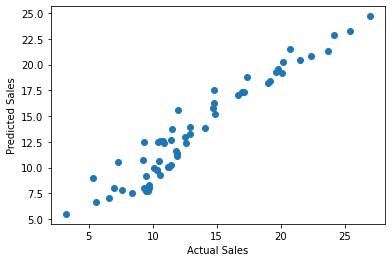

In [62]:
#Create a scatterplot of the real test values versus the predicteed values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

#### Evaluating the Model

The model performance will be evaluated by calculating the residual sum of squares and the explained variable score (R-squared). 

In [63]:
from sklearn import metrics
print('MAE  :', metrics.mean_absolute_error(y_test,predictions))
print('MSE  :', metrics.mean_squared_error(y_test,predictions))
print('RMSE  :', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('R-squared  :', ols_model.rsquared)

MAE  : 1.2137457736144808
MSE  : 2.298716697886379
RMSE  : 1.5161519375993882
R-squared  : 0.8972106381789522


#### Residuals

Now we'll explore the residuals to make sure everything was okay with our data.

Plot a histogram of the residuals, if it looks normally distribted, we're on the right track

In [67]:
residuals = y_test - predictions

C:\Users\ABDULMOJEED\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

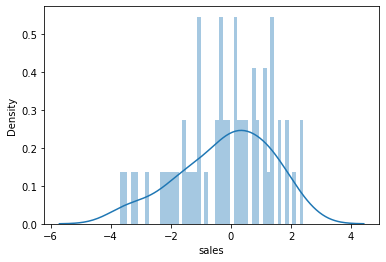

In [68]:
sns.distplot(residuals, bins=50)

In [69]:
coeff_df

,Coefficient
TV,0.044696
radio,0.187566
newspaper,-0.000323


#### The interpretation of the coefficients goes thus:

- a 1 unit increase in TV ads is associated with an 0.044696 increase in sales
- a 1 unit increase in radio ads is associated with an 0.187566 increase in sales
- a 1 unit increase in newspapper ads is associated with an -0.000323 increase in sales

#### Conclusion

The answer to the business problem (Should companies focus more on TV, radio, newspapper ads?) goes thus: The companies should focus more on promoting radio ads to see a larger increase in sales.